In [1]:
# Non-functioning: Should create a live plot from serial input, but
# doesn't work yet.

import serial

/var/folders/13/xknb65b54xd70pmy1kr9rrjr0000gn/T/ipykernel_31439/479833766.py:82: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


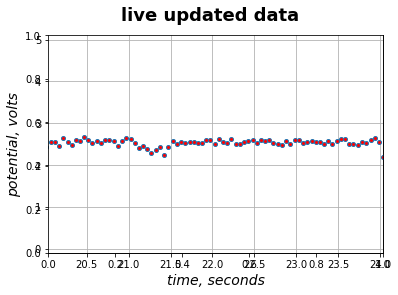

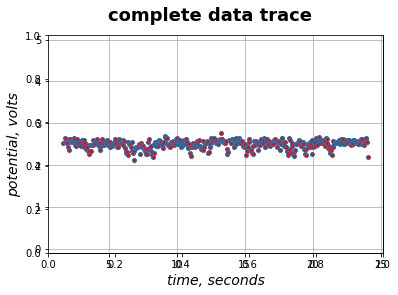

In [2]:
# %matplotlib notebook
# %matplotlib widget
# %matplotlib inline

# run this in a Jupyter (IPython) Notebook!
# modified from http://www.lebsanft.org/?p=48
# http://pyserial.readthedocs.org/en/latest/pyserial_api.html
import serial
import numpy as np
from matplotlib import pyplot as plt
from time import time

# If you're not using Linux, you'll need to change this
# check the Arduino IDE to see what serial port it's attached to
ser = serial.Serial("/dev/tty.usbmodem14101", 115200)

# set plot to animated
plt.ion() 

start_time = time()
timepoints = []
ydata = []
yrange = [-0.1,5.1]
view_time = 4 # seconds of data to view at once
duration = 24 # total seconds to collect data

fig1 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig1.suptitle('live updated data', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)
line1, = plt.plot(ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
plt.xlim([0,view_time])

# flush any junk left in the serial buffer
ser.flushInput()
# ser.reset_input_buffer() # for pyserial 3.0+
run = True

# collect the data and plot a moving frame
while run:
    ser.reset_input_buffer()
    data = ser.readline()#.split(b' ')     ## EDIT ##
    
    # sometimes the incoming data is garbage, so just 'try' to do this
    try:
        # store the entire dataset for later
#         ydata.append(float(data[0])*5.0/1024)
        ydata.append(float(data)*5.0/1024)     ## EDIT ##
        timepoints.append(time()-start_time)
        current_time = timepoints[-1]
        
        # update the plotted data
        line1.set_xdata(timepoints)
        line1.set_ydata(ydata)
        
        # slide the viewing frame along
        if current_time > view_time:
            plt.xlim([current_time-view_time,current_time])
            
        # when time's up, kill the collect+plot loop
        if timepoints[-1] > duration: run=False
    
    # if the try statement throws an error, just do nothing
    except: pass
    
    # update the plot
    fig1.canvas.draw()

# plot all of the data you collected
fig2 = plt.figure()
# http://matplotlib.org/users/text_props.html
fig2.suptitle('complete data trace', fontsize='18', fontweight='bold')
plt.xlabel('time, seconds', fontsize='14', fontstyle='italic')
plt.ylabel('potential, volts', fontsize='14', fontstyle='italic')
plt.axes().grid(True)

plt.plot(timepoints, ydata,marker='o',markersize=4,linestyle='none',markerfacecolor='red')
plt.ylim(yrange)
fig2.show()

ser.close()

In [5]:
help("modules")


Please wait a moment while I gather a list of all available modules...



/Users/nirvanabear/.local/share/virtualenvs/Programs-yEAyCHKM/lib/python3.9/site-packages/IPython/kernel/__init__.py:12: ShimWarning: The `IPython.kernel` package has been deprecated since IPython 4.0.You should import from ipykernel or jupyter_client instead.
  warn("The `IPython.kernel` package has been deprecated since IPython 4.0."
/usr/local/Cellar/python@3.9/3.9.4/Frameworks/Python.framework/Versions/3.9/lib/python3.9/pkgutil.py:93: MatplotlibDeprecationWarning: 
The matplotlib.compat module was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  __import__(info.name)


IPython             _zoneinfo           importlib           reprlib
PIL                 abc                 inspect             resource
RealTimeSerialPlot  aifc                io                  rlcompleter
__future__          antigravity         ipaddress           rmagic
_abc                appnope             ipykernel           runpy
_aix_support        argon2              ipykernel_launcher  sched
_ast                argparse            ipympl              secrets
_asyncio            array               ipython_genutils    select
_bisect             ast                 ipywidgets          selectors
_blake2             async_generator     itertools           send2trash
_bootlocale         asynchat            jedi                serial
_bootsubprocess     asyncio             jinja2              setuptools
_bz2                asyncore            json                shelve
_cffi_backend       atexit              jsonschema          shlex
_codecs             attr                jupyt

/usr/local/Cellar/python@3.9/3.9.4/Frameworks/Python.framework/Versions/3.9/lib/python3.9/pkgutil.py:108: VisibleDeprecationWarning: zmq.eventloop.minitornado is deprecated in pyzmq 14.0 and will be removed.
    Install tornado itself to use zmq with the tornado IOLoop.
    
  yield from walk_packages(path, info.name+'.', onerror)
